<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/multi_class_classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extending logistic regression to handle multi-class classification (more than two classes), one common approach is using the softmax regression (also known as multinomial logistic regression).

Here's a breakdown of the steps:

* Define the softmax function: This function generalizes the sigmoid function
* for multi-class classification and returns a probability distribution over the classes.
* Define the cross-entropy loss for softmax regression.
* Implement the gradient descent algorithm to optimize the weights.
* Train and test the softmax regression model.

In [37]:
import numpy as np

In [39]:
# 1. Softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z))  # to avoid numerical instability
    return e_z / e_z.sum(axis=1, keepdims=True)

# 2. Cross-entropy loss
def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / m

# 3. Gradient descent algorithm
def gradient_descent(X, y, alpha, num_iterations, n_classes):
    m, n = X.shape
    theta = np.zeros((n, n_classes))
    cost_history = []

    for _ in range(num_iterations):
        y_pred = softmax(np.dot(X, theta))
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost_history.append(cross_entropy(y, y_pred))

    return theta, cost_history

In [42]:
# Sample data (3 classes)
np.random.seed(42)
X = np.random.randn(100, 2)
Y = (X[:, 0] + X[:, 1]).astype(int) % 3

# Convert Y to one-hot encoded matrix
def one_hot_encode(Y, n_classes):
    m = len(Y)
    one_hot = np.zeros((m, n_classes))
    one_hot[np.arange(m), Y] = 1
    return one_hot

y = one_hot_encode(Y, 3)

# Add intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [43]:
# 4. Train the model
alpha = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, alpha, num_iterations, 3)

# Predict
def predict(X, theta):
    return np.argmax(softmax(np.dot(X, theta)), axis=1)

y_pred = predict(X, theta)

accuracy = np.mean(y_pred == Y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.00%


In [48]:
Y

array([0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2])

##  Visualization

In [45]:
import matplotlib.pyplot as plt

##  Visualize the training data

Text(0, 0.5, '$x_2$')

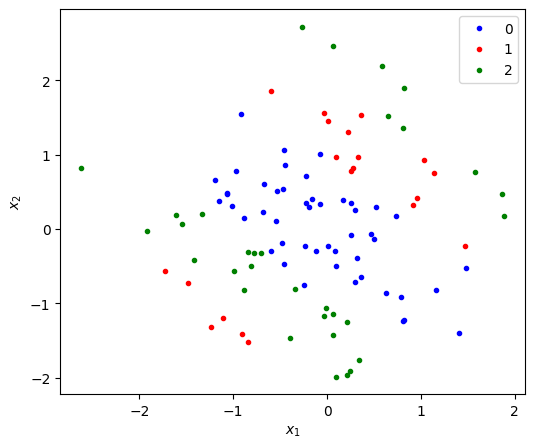

In [49]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(X[Y==0,1], X[Y==0,2],'.b', label='0')
ax.plot(X[Y==1,1], X[Y==1,2],'.r', label='1')
ax.plot(X[Y==2,1], X[Y==2,2],'.g', label='2')

ax.legend()
#ax.grid()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Visualize learning curve

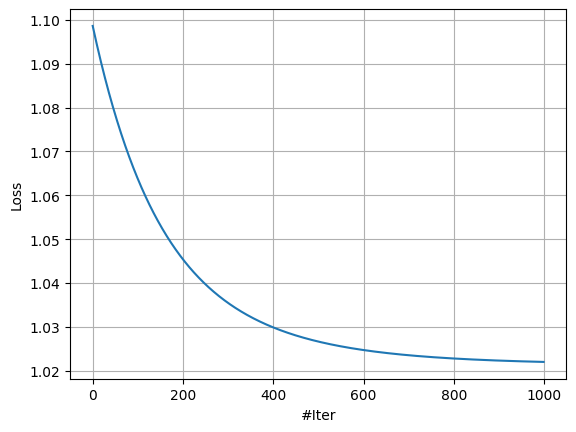

In [50]:
plt.plot(cost_history)
plt.xlabel("#Iter")
plt.ylabel('Loss')
plt.grid()

### plot decision boundary

In [56]:
# fig, ax = plt.subplots(figsize=(6,5))
# ax.plot(X[Y==0,1], X[Y==0,2],'.b', label='0')
# ax.plot(X[Y==1,1], X[Y==1,2],'.r', label='1')
# ax.plot(X[Y==2,1], X[Y==2,2],'.g', label='2')


# test_x = np.array([np.min(X[:,1]), np.max(X[:,1])])
# ax.plot(test_x, (-(theta[:,0]+theta[:,1]*test_x)/theta[:,2]).diff(),'--g', label='Decision Boundary')

# ax.legend()
# #ax.grid()
# ax.set_xlabel('$x_1$')
# ax.set_ylabel('$x_2$')

In [51]:
theta

array([[ 0.42879664, -0.42479039, -0.00400625],
       [ 0.04699244,  0.08160811, -0.12860054],
       [-0.03389749,  0.22339289, -0.1894954 ]])